In [2]:
###################################################
# Author: Hyeonsu Kang, Mark Buttweiler ###########
# Feb. 10. 2016 ###################################
###################################################

import pandas as pd

# load the data
totals = pd.read_csv("https://piazza.com/class_profile/get_resource/ij0cpi5tuaa4wv/ik6hlfvu8dk1vu", delimiter='\t', index_col=0)
guns = pd.read_csv("https://piazza.com/class_profile/get_resource/ij0cpi5tuaa4wv/ik6hlau5u2i26d", delimiter='\t', index_col=0)
gdp = pd.read_csv("https://piazza.com/class_profile/get_resource/ij0cpi5tuaa4wv/ik6hl6z36e81t3", delimiter='\t', index_col=1)

# Check each of the data set
print("totals")
print(totals)
print("guns")
print(guns)
print("gdp")
print(gdp)

# join the gun homicides and GDP data by country 
data = totals.join(guns).join(gdp)
print("data")
print(data)

# The columns are expanded to the widest form (206 rows in the end)

totals
                                  Homicides Total Homicides    Region  \
Country                                                                 
Honduras                               91.6           7,104  Americas   
El Salvador                            69.2           4,308  Americas   
Côte d'Ivoire                          56.9          10,801    Africa   
Jamaica                                52.2           1,430  Americas   
Venezuela                              45.1          13,080  Americas   
Belize                                 41.4             129  Americas   
U.S. Virgin Islands                    39.2              43  Americas   
Guatemala                              38.5           5,681  Americas   
Saint Kitts and Nevis                  38.2              20  Americas   
Zambia                                 38.0           4,710    Africa   
Uganda                                 36.3          11,373    Africa   
Malawi                                 36.0 

In [3]:
###### drop the NaN values 
cleanData = data.dropna()

# Add a value for gun homicides as a percent of homicides
cleanData['Percent Homicides'] = 100 * cleanData['Gun Homicides'] / cleanData['Homicides']
print(cleanData)

                Homicides Total Homicides    Region         Subregion  \
Country                                                                 
Kyrgyzstan           20.1           1,072      Asia      Central Asia   
Lithuania             6.6             219    Europe   Northern Europe   
Estonia               5.2              70    Europe   Northern Europe   
Georgia               4.3             187    Europe    Eastern Europe   
United States         4.2          12,996  Americas  Northern America   
Latvia                3.1              70    Europe   Northern Europe   
Finland               2.2             118    Europe   Northern Europe   
Israel                2.1            159+      Asia      Western Asia   
Bulgaria              2.0             147    Europe    Eastern Europe   
Romania               2.0             421    Europe    Eastern Europe   
Czech Republic        1.7             181    Europe    Eastern Europe   
Belgium               1.7             180    Europe

C:\Users\Hyeonsu\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#Sort the data by gdp, and then create an array called 'countrybygdp' that contains only GDP and homicides
data=data.sort_values(by='GDP', ascending=False)
countrybygdp=data.ix[:,['GDP','Homicides']]
print(countrybygdp)

                                    GDP  Homicides
Country                                           
Luxembourg                        89992        2.5
Qatar                             88919        0.9
Macau                             77607        0.7
Norway                            61882        0.6
Singapore                         61103        0.3
Kuwait                            54654        2.2
Brunei                            50506        0.5
Hong Kong                         49990        0.2
Switzerland                       49151        0.7
United States                     48442        4.2
United Arab Emirates              48222        0.8
Netherlands                       42834        1.1
Austria                           42225        0.6
Ireland                           41543        1.2
Sweden                            41300        1.0
Denmark                           40983        0.9
Canada                            40440        1.6
Australia                      

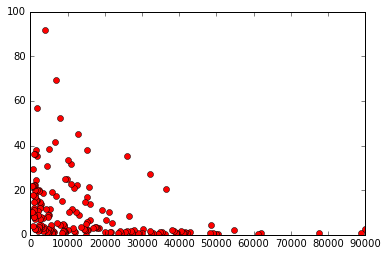

In [5]:
# Let's visualize it. 
# First, import matplotlib.pyplot as plt and make sure that your graphs open inline
import matplotlib.pyplot as plt
%matplotlib inline

#Graph gun deaths on the y axis and GDP on the x-axis [NOTE! Matplotlib asks for x first and y second]
plt.plot(countrybygdp['GDP'], countrybygdp['Homicides'], 'ro')
plt.show()

                                    GDP  Homicides
Country                                           
Luxembourg                        89992        2.5
Qatar                             88919        0.9
Macau                             77607        0.7
Norway                            61882        0.6
Singapore                         61103        0.3
Kuwait                            54654        2.2
Brunei                            50506        0.5
Hong Kong                         49990        0.2
Switzerland                       49151        0.7
United States                     48442        4.2
United Arab Emirates              48222        0.8
Netherlands                       42834        1.1
Austria                           42225        0.6
Ireland                           41543        1.2
Sweden                            41300        1.0
Denmark                           40983        0.9
Canada                            40440        1.6
Australia                      

(array([  1.07172967e-04,   6.30429217e-05,   5.04343374e-05,
          2.83693148e-05,   3.15214609e-05,   2.52171687e-05,
          2.52171687e-05,   1.57607304e-05,   3.46736069e-05,
          1.26085843e-05,   9.45643826e-06,   1.26085843e-05,
          3.15214609e-06,   1.26085843e-05,   1.26085843e-05,
          1.26085843e-05,   6.30429217e-06,   9.45643826e-06,
          6.30429217e-06,   9.45643826e-06,   3.15214609e-06,
          1.26085843e-05,   1.26085843e-05,   6.30429217e-06,
          0.00000000e+00,   0.00000000e+00,   6.30429217e-06,
          9.45643826e-06,   0.00000000e+00,   0.00000000e+00,
          3.15214609e-06,   0.00000000e+00,   0.00000000e+00,
          3.15214609e-06,   3.15214609e-06,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.15214609e-06,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

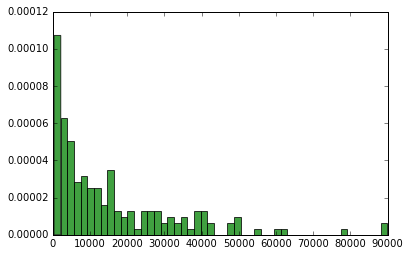

In [6]:
#It appears that there may be some sort of relatoinship. 
print(countrybygdp)
#GDP may need to be transformed. Generate a histogram using matplotlib. 
# matplotlib.pyplot.hist(x, bins=10, range=None, normed=False)
#You need to remove NA values
plt.hist(countrybygdp['GDP'].dropna(), bins=50, normed=1, facecolor='green', alpha=0.75)

#What about homicides?

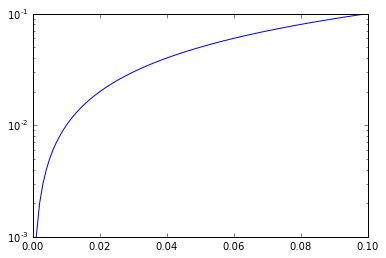

In [7]:
#Add a log gdp variable and a log homicide variable to your countrygdp data set using numpy
#First, you will need to import numpy. Let's set it as np
import numpy as np

# we need to add a small number to prevent 0 flowing into the log function.
# Let's checkout the log graph.
plt.plot(np.arange(0, 0.1, 0.001), np.arange(0, 0.1, 0.001))
plt.yscale('log')
plt.show()

# And actually adding the log columns

countrybygdp['loggdp']=np.log(countrybygdp['GDP'].dropna() + 0.001)
countrybygdp['loghomicides']=np.log(countrybygdp['Homicides'].dropna() + 0.001)

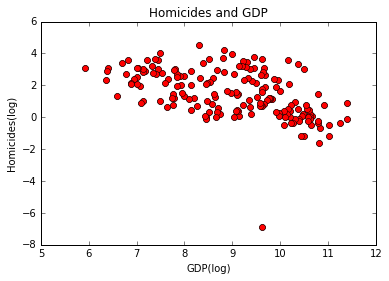

In [8]:
#Now, let's try graphing again to see if there is a relationship between Log(GDP) and Homicides
plt.plot(countrybygdp['loggdp'], countrybygdp['loghomicides'], 'ro')

#Let's create the title and labels
plt.plot(countrybygdp['loggdp'], countrybygdp['loghomicides'], 'ro')
plt.title("Homicides and GDP")
plt.ylabel("Homicides(log)")
plt.xlabel("GDP(log)")
plt.show()


In [20]:
#That's cool, but let's automate this a bit. 
#Let's try creating a function that takes two variables, shows histograms for the two, logs the variables, 
#histograms the new variables, and then creates a scatter plot with var1 as x and var2 as y

def plotHisto(data, bins = 50, normed = 1, facecolor = 'red', alpha = 0.75):
    '''@data: one-column Series 
       @return: None, draws a plot
    '''
    if (data.empty):
        print('No data')
        return
    
    plt.hist(data, bins = bins, normed = normed, facecolor = facecolor, alpha = alpha) 
    plt.title("Histogram for " + data.name)
    plt.show()
    
def plotTwoWayScatter(data, xlab, ylab):
    '''@data: two-column dataframe [x, y] and two labels
       @return: None, draws a plot
    '''
    if (len(data.columns) >= 2):
        data.dropna()
        plt.scatter(data[xlab], data[ylab])
        plt.title("Two-way Scatter")
        plt.xlabel(xlab + " logged")
        plt.ylabel(ylab + " logged")
        plt.show()
        # and fitting a line
        
# RECAP - create a stacked bar graph
def plotStacked(data, btmLab, topLab, limit=10):
    data.dropna()
    data = data.ix[:,[btmLab, topLab]][:limit]
    data['Total Homicides'] = data[topLab] - data[btmLab]
    del data[topLab]
    data.plot(kind='bar', stacked=True, sort_columns=True)
    plt.ylabel("per 100k")
    plt.show()
    
# Check out 'loggdp', 'Gun Suicides', 'loghomicides' histograms

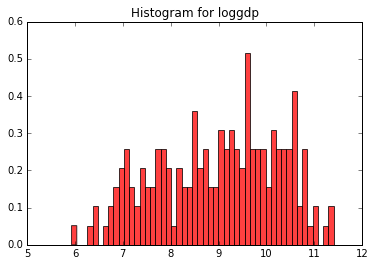

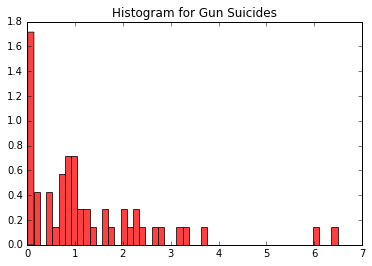

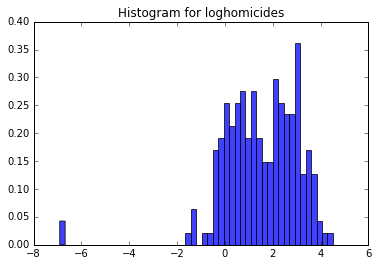

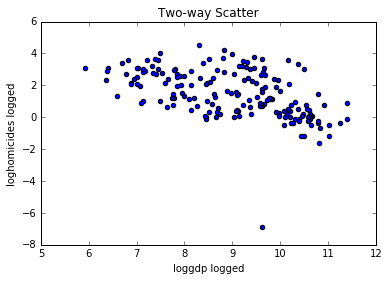

In [19]:
# Check out 'loggdp', 'Gun Suicides', 'loghomicides' histograms

plotHisto(countrybygdp['loggdp'].dropna())

plotHisto(guns['Gun Suicides'].dropna())

plotHisto(countrybygdp['loghomicides'].dropna(), facecolor='blue')

# Check out 'loggdp', 'Gun Suicides', 'loghomicides' histograms
plotTwoWayScatter(countrybygdp, 'loggdp', 'loghomicides')

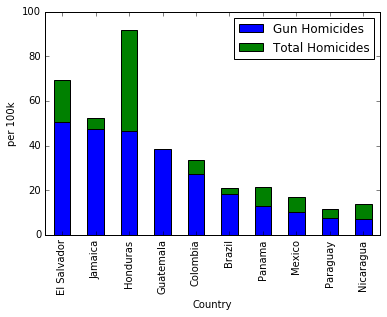

In [15]:
plotStacked(data.sort_values(by='Gun Homicides', ascending=False), 'Gun Homicides', 'Homicides')